In [1]:
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

LB=load_wine()
data=LB.data
names=LB.feature_names
df=pd.DataFrame(data=data,columns=names)

Se desea encontrar una relación lineal entre variables con el objetivo de reducir el número de variables en un modelo de claseificación.

In [2]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


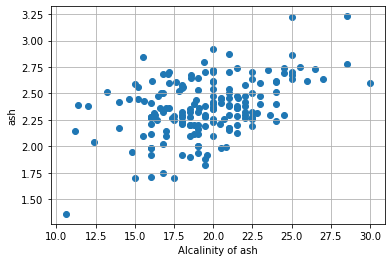

In [5]:
# Relación entre 'alcalinity_of_ash' (x) vs 'ash' (y)
plt.scatter(df['alcalinity_of_ash'],df['ash'])
plt.ylabel('ash')
plt.xlabel('Alcalinity of ash')
plt.grid()

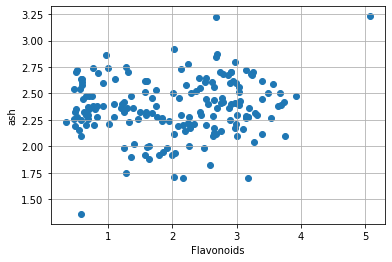

In [6]:
# Relación entre 'flavanoids' (x) vs 'ash' (y)
plt.scatter(df['flavanoids'],df['ash'])
plt.ylabel('ash')
plt.xlabel('Flavonoids')
plt.grid()

In [7]:
# Función para encontrar el mínimo del promedio de las diferencias al cuadrado
import scipy.optimize as opt

In [9]:
opt.minimize?

In [10]:
# Función a minimizar
def fun(a,x,y):
  f=a[0]+a[1]*x
  return np.mean((f-y)**2)

In [11]:
a0=np.random.rand(2)
sol=opt.minimize(fun,a0,args=(df['alcalinity_of_ash'],df['ash']))
sol

      fun: 0.06012981364540054
 hess_inv: array([[17.63488547, -0.87894212],
       [-0.87894212,  0.04508435]])
      jac: array([1.07102096e-08, 2.27708369e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([1.65646791, 0.03642221])

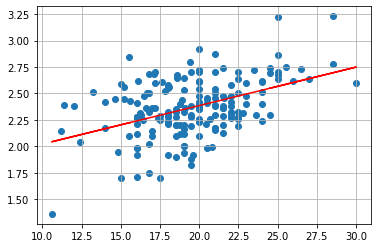

In [12]:
plt.scatter(df['alcalinity_of_ash'],df['ash'])
f=sol.x[0]+sol.x[1]*df['alcalinity_of_ash']
plt.plot(df['alcalinity_of_ash'],f,'r')
plt.grid()

In [22]:
x2=df['flavanoids']
a0=np.random.rand(2)
sol2=opt.minimize(fun,a0,args=(x2,df['ash']))
sol2

      fun: 0.07385068677099055
 hess_inv: array([[ 2.57533484, -1.02270037],
       [-1.02270037,  0.5039746 ]])
      jac: array([ 9.31322575e-09, -1.21071935e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([2.30237813, 0.0316068 ])

In [17]:
# Clase para encontrar el modelo lineal
from sklearn.linear_model import LinearRegression

In [23]:
lin=LinearRegression()
x1=df[['alcalinity_of_ash']]
x2=df[['flavanoids']]
lin.fit(x1,df['ash'])

LinearRegression()

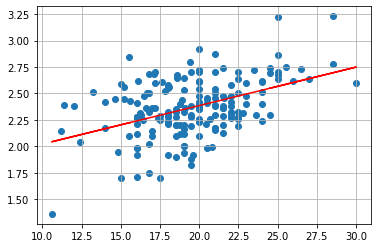

In [24]:
plt.scatter(x1,df['ash'])
plt.plot(x1,lin.predict(x1),'r')
plt.grid()

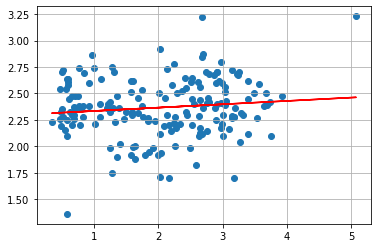

In [25]:
lin.fit(x2,df['ash'])
plt.scatter(x2,df['ash'])
plt.plot(x2,lin.predict(x2),'r')
plt.grid()

In [26]:
lin.coef_

array([0.03160684])

In [27]:
lin.intercept_

2.3023780616508027

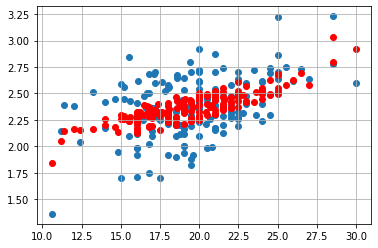

In [29]:
# Encontrar la relación entre 'flavanoids' y 'alcalinity_of_ash' vs 'ash'
x=df[['alcalinity_of_ash','flavanoids']]
y=df['ash']
lin.fit(x,y)

# Proyección de de 'f' sobre 'alcalinity_of_ash'
plt.scatter(x.iloc[:,0],y)
f=lin.predict(x)
plt.scatter(x.iloc[:,0],f,c='r')
plt.grid()

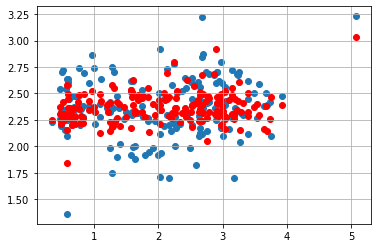

In [30]:
# Proyección de 'f' sobre 'flavanoids'
plt.scatter(x.iloc[:,1],y)
plt.scatter(x.iloc[:,1],f,c='r')
plt.grid()

In [31]:
lin.coef_

array([0.04534213, 0.08487309])

In [32]:
lin.intercept_

1.3103441672107292